In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

folder_path = "../../eval_results"

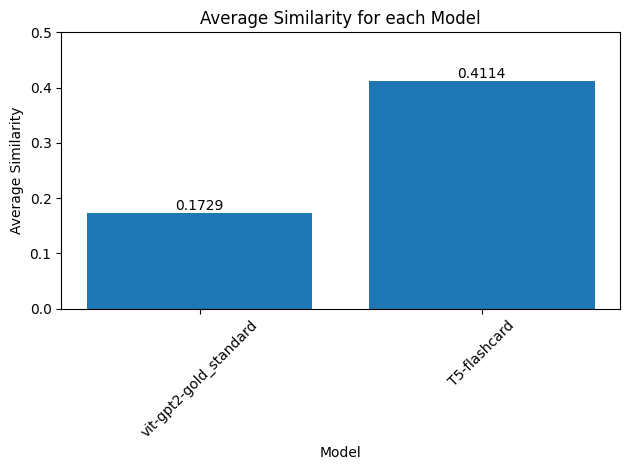

In [36]:
model_names = []
average_similarities = []

# Iterate through the subfolders in the main folder
for root, dirs, files in os.walk(folder_path):
    for dir_name in dirs:
        subfolder_path = os.path.join(root, dir_name)
        csv_path = os.path.join(subfolder_path, "cosine_sim.csv")

        if os.path.exists(csv_path):
            df = pd.read_csv(csv_path)
            average_similarity = df['similiarities'].mean()
            model_names.append(dir_name)
            average_similarities.append(average_similarity)

# Plotting the bar chart
plt.bar(model_names, average_similarities)
plt.xlabel("Model")
plt.ylabel("Average Similarity")
plt.title("Average Similarity for each Model")
plt.xticks(rotation=45)
# Add numerical values to each bar
for i, v in enumerate(average_similarities):
    plt.text(i, v, str(round(v, 4)), ha="center", va="bottom")

plt.ylim(0, 0.5)
plt.tight_layout()
plt.savefig("plots/cosine_sim_barplot.png", dpi=150)
plt.show()

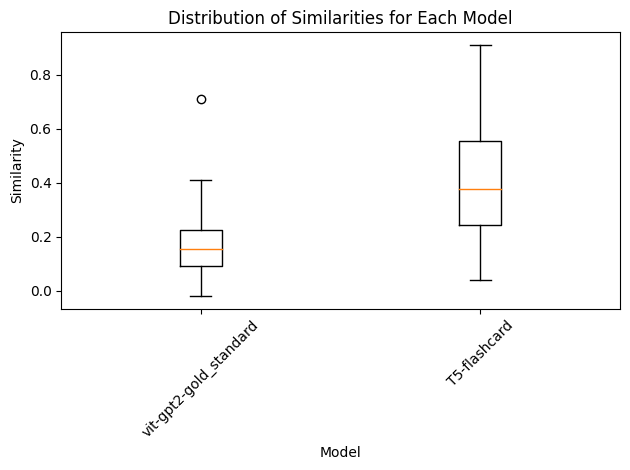

In [37]:
# Initialize a list to store the similarity data for each model
similarity_data = []

# Iterate through the subfolders in the main folder
for root, dirs, files in os.walk(folder_path):
    for dir_name in dirs:
        subfolder_path = os.path.join(root, dir_name)
        csv_path = os.path.join(subfolder_path, "cosine_sim.csv")

        # Check if the cosine_sim.csv file exists in the subfolder
        if os.path.exists(csv_path):
            df = pd.read_csv(csv_path)
            similarity_data.append(df['similiarities'])

# Plotting the boxplot
plt.boxplot(similarity_data, labels=model_names)
plt.xlabel("Model")
plt.ylabel("Similarity")
plt.title("Distribution of Similarities for Each Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plots/cosine_sim_boxplot.png", dpi=150)
plt.show()

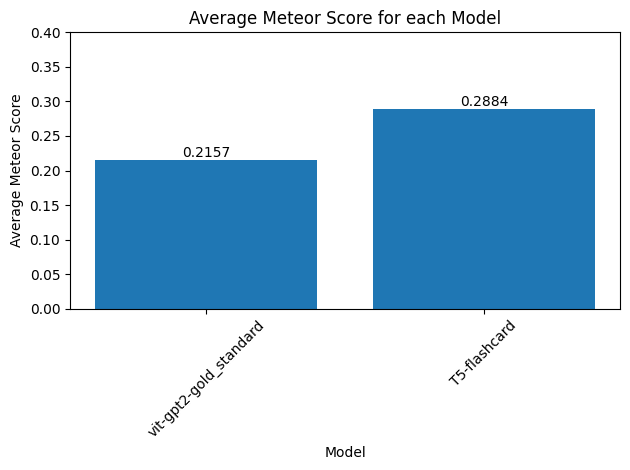

In [39]:
model_names = []
average_similarities = []

# Iterate through the subfolders in the main folder
for root, dirs, files in os.walk(folder_path):
    for dir_name in dirs:
        subfolder_path = os.path.join(root, dir_name)
        csv_path = os.path.join(subfolder_path, "sem_meteor.csv")

        if os.path.exists(csv_path):
            df = pd.read_csv(csv_path)
            average_similarity = df['sem_meteor'].mean()
            model_names.append(dir_name)
            average_similarities.append(average_similarity)

# Plotting the bar chart
plt.bar(model_names, average_similarities)
plt.xlabel("Model")
plt.ylabel("Average Meteor Score")
plt.title("Average Meteor Score for each Model")
plt.xticks(rotation=45)
# Add numerical values to each bar
for i, v in enumerate(average_similarities):
    plt.text(i, v, str(round(v, 4)), ha="center", va="bottom")

plt.ylim(0, 0.4)

plt.tight_layout()
plt.savefig("plots/meteor_barplot.png", dpi=150)
plt.show()

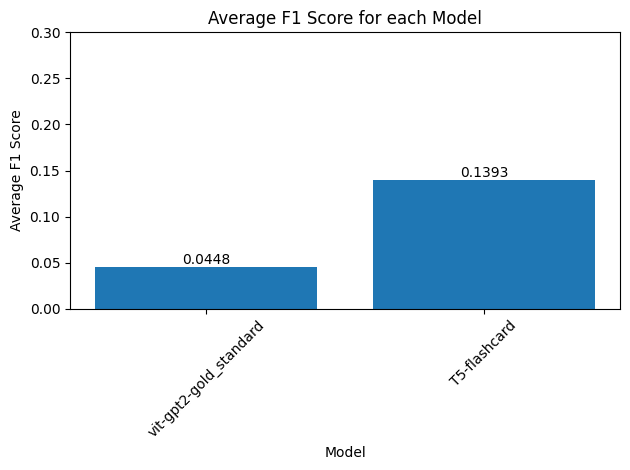

In [41]:
model_names = []
average_similarities = []

# Iterate through the subfolders in the main folder
for root, dirs, files in os.walk(folder_path):
    for dir_name in dirs:
        subfolder_path = os.path.join(root, dir_name)
        csv_path = os.path.join(subfolder_path, "traditional_scores.csv")

        if os.path.exists(csv_path):
            df = pd.read_csv(csv_path)
            average_similarity = df['f1'].mean()
            model_names.append(dir_name)
            average_similarities.append(average_similarity)

# Plotting the bar chart
plt.bar(model_names, average_similarities)
plt.xlabel("Model")
plt.ylabel("Average F1 Score")
plt.title("Average F1 Score for each Model")
plt.xticks(rotation=45)
# Add numerical values to each bar
for i, v in enumerate(average_similarities):
    plt.text(i, v, str(round(v, 4)), ha="center", va="bottom")

plt.ylim(0, 0.3)

plt.tight_layout()
plt.savefig("plots/traditional_scores_f1_barplot.png", dpi=150)
plt.show()